# HNCDI Explain: Practical Guide to Quantum Computing

### Tutorial 1

### Install the qiskit library in the colab environment

Please run the below cell to ensure the notebook has qiskit installed.

In [2]:
# Install the qiskit library
%pip install 'qiskit[visualization]'
%pip install qiskit-ibm-runtime
%pip install qiskit-aer


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import the necessary modules from the Qiskit library


In [3]:
import numpy as np
from qiskit.visualization import *
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit_aer.primitives import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as real_sampler
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
import matplotlib.pyplot as plt

## Tutorial 1: Create a Bell state and Run on a Simulator

### Create your Bell state circuit

In [4]:
# Create your Bell state circuit

number_of_qubits = 2
number_of_classical_bits = 2

qreg_q = QuantumRegister(number_of_qubits, 'q')
creg_c = ClassicalRegister(number_of_classical_bits, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## Submit Bell state circuit to a simulator

In [5]:
simulator_backend = AerSimulator()

In [6]:
# Submit job to simulator backend
simulator_job = simulator_backend.run(circuit, shots=1024).result()

In [7]:
# List measurement outcomes
simulator_job_counts = simulator_job.get_counts()
simulator_job_counts

{'00': 560, '11': 464}

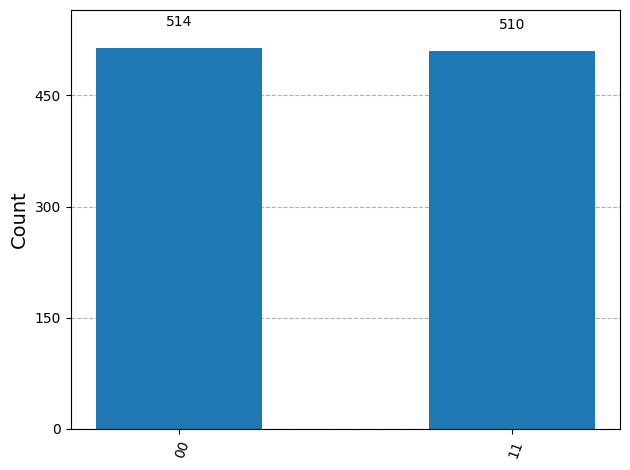

In [7]:
# Plot measurement outcomes 
plot_histogram(simulator_job_counts)

## Homework: Submit your Bell state circuit to real quantum hardware

### Authenticate with IBM quantum

You will require the API token specified in the IBM quantum platform to ensure you can execute your code on a real quantum computer.

In [ ]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="hncdi-explain",
    overwrite=True,
)

In [ ]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="hncdi-explain")
service.saved_accounts()

In [ ]:
# View backends
service.backends()

In [10]:
# Find least busy machine to submit a job to. Set IBMQ backend to this machine.
backend = service.least_busy(operational=True, simulator=False)
sampler = real_sampler(backend)

In [ ]:
# Transpile your circuit for the IBMQ backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw()

In [12]:
# Submit job to IBMQ backend
job = sampler.run([transpiled_circuit], shots=1024)
results = job.result()

In [ ]:
# List measurement outcomes
result = results[0].data.c
measurements = result.get_counts()
measurements

In [ ]:
# Plot measurement outcomes
plot_histogram(measurements)